## MILESTONE 1

In [83]:

#Regular EDA (Exploration Data Analysis)

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns



# Models from sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve


## PROBLEM DEFINITION:
   * We are trying to predict the  if a patient has heart disease based on the test which are conducted on them.

## EVALUATION
* If we reach a score of 95% then we will pursue the project
    


## FEATURES:
   
      1. age: age in years
      2. sex: sex (1 = male; 0 = female)
      3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
      5. chol: serum cholestoral in mg/dl
      6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
      7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
      8. thalach: maximum heart rate achieved
     9 exang: exercise induced angina (1 = yes; 0 = no)
     10 oldpeak = ST depression induced by exercise relative to rest
     11 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     12 ca: number of major vessels (0-3) colored by flourosopy 
     13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     14 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        
    

## Load Data

In [84]:
df = pd.read_csv("6.1 heart-disease.csv")

# DATA EXPLORATION (EDA)

## The goal here is to find out more about the data and become a subject mattere export on the dataset

1. What questions am I trying to solve
2. What kind of data do we have and how do we treat different types
3. What is missing from our data and how do we deal with it
4. What are the outliers and why should we care about them
5. How can we add, remove and change features to get more out of the data


In [85]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [88]:
df.shape

(303, 14)

In [89]:
df["target"]. value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

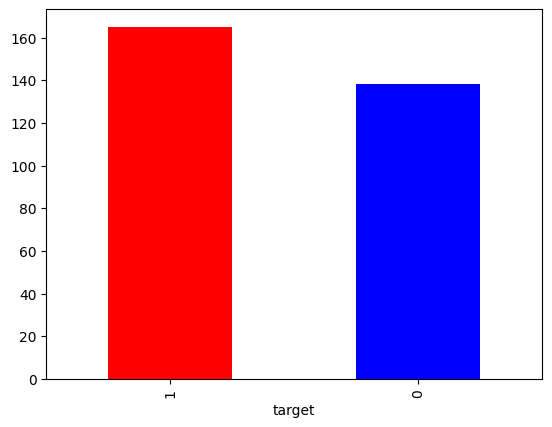

In [90]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [93]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## HEARY DISEASE FREQUENCY ACCORDING TO SEX

In [94]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [95]:
sex_compare_target = pd.crosstab(df.target, df.sex)

In [96]:
sex_compare_target

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

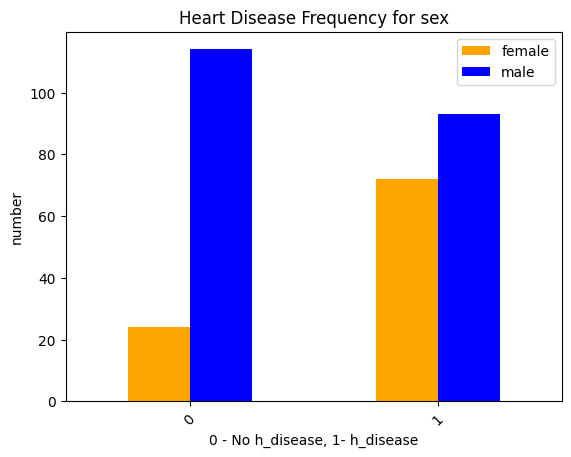

In [97]:
sex_compare_target.plot(kind="bar", color=["orange", "blue" ])

plt.xlabel("0 - No h_disease, 1- h_disease")
plt.ylabel("number")
plt.title("Heart Disease Frequency for sex")
plt.legend(['female', 'male'])
plt.xticks(rotation= 45)

# AGE VS MAX HEART RATE (THALACH)

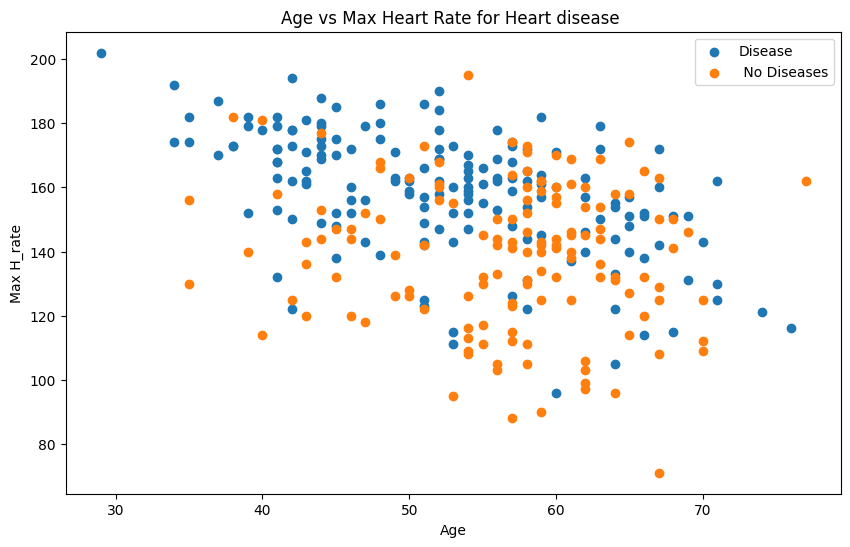

In [98]:
# Create a plot





plt.figure(figsize=(10, 6))

# scatter positives
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1])

# scatter negatives
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0])

plt.title("Age vs Max Heart Rate for Heart disease ")
plt.xlabel("Age")
plt.ylabel("Max H_rate")
plt.legend(["Disease", " No Diseases"]);

# SLOPE VS TARGET

 
### SLOPE: the slope of the peak exercise ST segment
* -- Value 0: upsloping
* -- Value 1: flat
* -- Value 2: downsloping

In [99]:
df.slope.value_counts()

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [100]:
slope_vs_target = pd.crosstab(df.slope, df.target)

In [101]:
slope_vs_target

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [102]:
def plot_config(title, xlabel, ylabel, legend):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(legend)
    plt.xticks(rotation= 45)

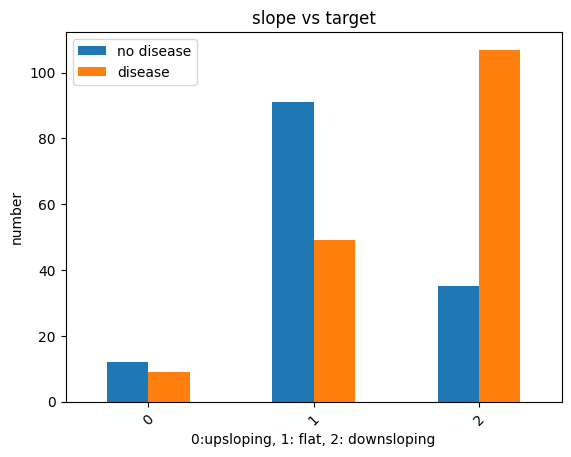

In [103]:
slope_vs_target.plot(kind ='bar')
plot_config("slope vs target", "0:upsloping, 1: flat, 2: downsloping", "number", ["no disease", "disease"])


# CHEST PAIN VS TARGET


## cp: chest pain type
* -- Value 0: typical angina
* -- Value 1: atypical angina
* -- Value 2: non-anginal pain
* -- Value 3: asymptomatic

In [104]:
cp_vs_target = pd.crosstab(df.cp, df.target)

In [105]:
cp_vs_target

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


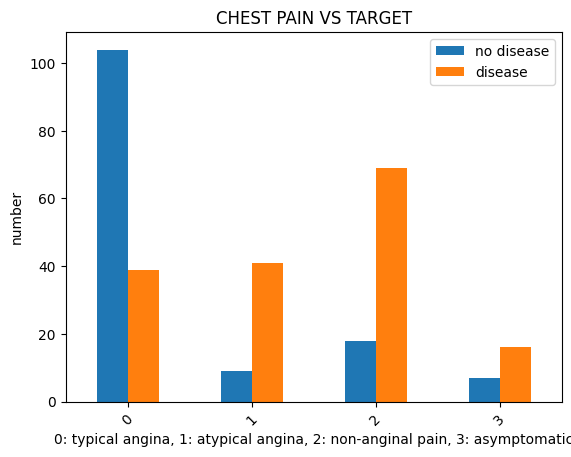

In [106]:
cp_vs_target.plot(kind="bar")

plot_config("CHEST PAIN VS TARGET","0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic", "number", ["no disease", "disease"])

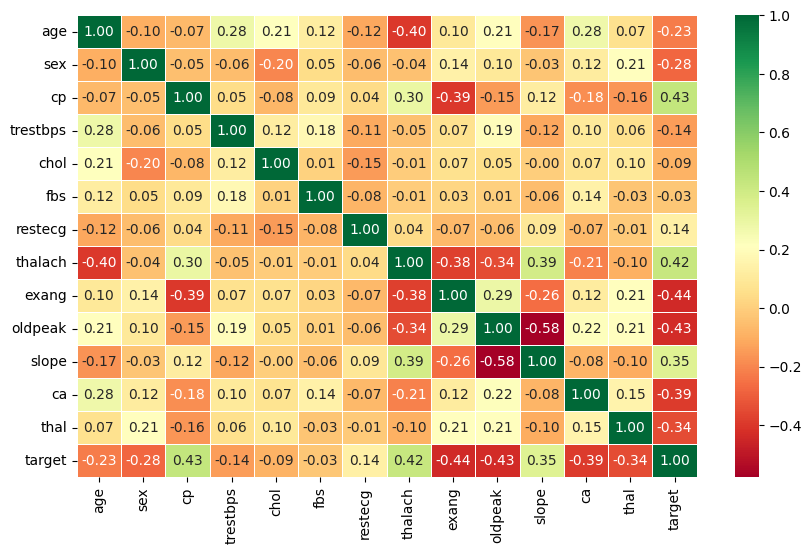

In [107]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, cmap = 'RdYlGn', fmt= ".2f")



# MODELLING

In [116]:
def split(df, target):
        X = df.drop(target, axis = 1 )
        y = df[target]
        X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2)
        
        return X_train, X_test, Y_train, Y_test

In [117]:
X_train, X_test, Y_train, Y_test = split(df, "target")

In [118]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2


### Now that we have prepared our data, it's time to 
1. train our data using the train data
2. test our model using the test data

#### In this we are going to use the these three classifier estimators:
1. RandomForestClassifier
2. Logistic Regression
3. KNearestNeighbour


In [120]:

def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    
    Fits and scores the model
    models: a dict of scikit-learn models to be used
    X_train: Training data(no labels)
    X_test: Testing data (no labels)
    Y_train: Training labels
    Y_test: Testing labels
    """
    
    np.random.seed()
    model_scores ={}
    for name, model in models.items():
        
        model.fit(X_train, Y_train)
        
        model_scores[name] = model.score(X_test, Y_test)
        
    return model_scores    
        
         
    
    

In [123]:
models = {"Logistic Regression": LogisticRegression(), "RandomForestClassifier": RandomForestClassifier(), "KNN": KNeighborsClassifier() }

In [125]:
model_scores = fit_and_score(models,X_train, X_test, Y_train, Y_test)

C:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
compare_models =  pd.DataFrame(model_scores)

ValueError: If using all scalar values, you must pass an index

In [135]:
compare_models = pd.DataFrame(model_scores, index= ["accuracy"] )

In [136]:
compare_models

,Logistic Regression,RandomForestClassifier,KNN
accuracy,0.770492,0.836066,0.655738


In [139]:
compare_models.T


,accuracy
Logistic Regression,0.770492
RandomForestClassifier,0.836066
KNN,0.655738


<Axes: >

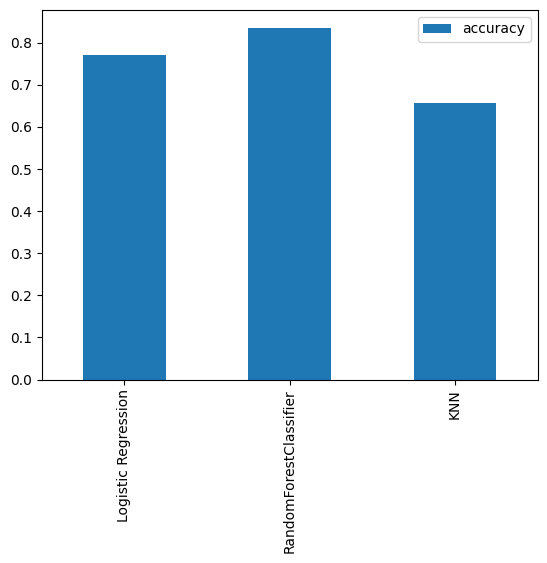

In [140]:
compare_models.T.plot.bar()